<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/DoencasDePele/DoencasDePele_CNN_Model_93_acc_GoogleColab_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doenças de Pele - CNN (Convolutional Neural Networks)
![CNN ’odel Architectural](https://image.ibb.co/n8PBkL/cover.png)

In [1]:
!nvidia-smi

Sat Nov  2 20:49:43 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Copia dataset do Google Drive para o Google Colab

In [2]:
# montar arquivos do google drive
# Load the Drive helper and mount
from google.colab import drive

# This wil4/sQGDWqag5BEQ1ZcL_AIduqhWI8gMxns8IZCr2wjTVaiI_7MmJPXGh18l prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%%time
!cp drive/'My Drive'/datasets/DoencasDePele-2019/skin-cancer-mnist-ham10000-NEW.zip .
!unzip skin-cancer-mnist-ham10000-NEW.zip

Archive:  skin-cancer-mnist-ham10000-NEW.zip
   creating: skin-cancer-mnist-ham10000/
  inflating: __MACOSX/._skin-cancer-mnist-ham10000  
  inflating: skin-cancer-mnist-ham10000/hmnist_28_28_L.csv  
  inflating: __MACOSX/skin-cancer-mnist-ham10000/._hmnist_28_28_L.csv  
  inflating: skin-cancer-mnist-ham10000/Untitled.ipynb  
  inflating: __MACOSX/skin-cancer-mnist-ham10000/._Untitled.ipynb  
  inflating: skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv  
  inflating: __MACOSX/skin-cancer-mnist-ham10000/._hmnist_28_28_RGB.csv  
   creating: skin-cancer-mnist-ham10000/HAM10000_images_part_1/
  inflating: __MACOSX/skin-cancer-mnist-ham10000/._HAM10000_images_part_1  
  inflating: skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv  
  inflating: __MACOSX/skin-cancer-mnist-ham10000/._hmnist_8_8_RGB.csv  
   creating: skin-cancer-mnist-ham10000/.ipynb_checkpoints/
  inflating: __MACOSX/skin-cancer-mnist-ham10000/._.ipynb_checkpoints  
  inflating: skin-cancer-mnist-ham10000/hmnist_8_8_L.csv  
  

# Criiar um ambiente virtual para Rodar este Modelo 
## (requer versões específicas de pacotes python, keras e tensorflow)

In [0]:
#!pip install python==3.6.6  

In [5]:
!pip install tensorflow=1.14.0

ERROR: Invalid requirement: 'tensorflow=1.14.0'
Hint: = is not a valid operator. Did you mean == ?


In [6]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [7]:
pip install keras==2.3.0

     |████████████████████████████████| 378kB 2.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [8]:
# Criar um ambiente virtural


'''
conda create -n tf366 python==3.6.6  tensorflow=1.14.0
conda activate tf366
pip install keras==2.3.0
pip install jupyter
python -m ipykernel install --name tf366
pip install pandas
pip install scikit-learn
pip install matplotlib

#conda env remove -n tf366
'''

'\nconda create -n tf366 python==3.6.6  tensorflow=1.14.0\nconda activate tf366\npip install keras==2.3.0\npip install jupyter\npython -m ipykernel install --name tf366\npip install pandas\npip install scikit-learn\npip install matplotlib\n\n#conda env remove -n tf366\n'

# Bibliotecas e Frameworks python

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
from keras.utils.np_utils import to_categorical

# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [10]:
%%time
#folder_i7 = "/Users/valencar/Dropbox/datasets/DoencasDePele-2019/skin-cancer-mnist-ham10000"
#folder_i5 = "/Users/vladimiralencar/Documents/datasets/DoencasDePele-2019/skin-cancer-mnist-ham10000"
folder_google_colab = "skin-cancer-mnist-ham10000/"
folder = folder_google_colab
base_skin_dir = os.path.join('.', folder)
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

CPU times: user 45 ms, sys: 5.78 ms, total: 50.8 ms
Wall time: 51.5 ms


In [11]:
tile_df = pd.read_csv(folder + '/' + 'HAM10000_metadata.csv')
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
6370,HAM_0003440,ISIC_0026943,nv,follow_up,30.0,female,lower extremity,./skin-cancer-mnist-ham10000/HAM10000_images_p...,Melanocytic nevi,4
5671,HAM_0000283,ISIC_0025159,nv,follow_up,35.0,female,back,./skin-cancer-mnist-ham10000/HAM10000_images_p...,Melanocytic nevi,4
8386,HAM_0002986,ISIC_0028706,nv,histo,70.0,female,foot,./skin-cancer-mnist-ham10000/HAM10000_images_p...,Melanocytic nevi,4


# Limpeza dos Dados

In [12]:
tile_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

Preencher NULL values com a média.

In [0]:
tile_df['age'].fillna((tile_df['age'].mean()), inplace=True)

Checando...

In [14]:
tile_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [15]:
import sys
print(sys.version)

3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]


## Carregendo e redimensionando as imagens
As imagens foram redimensionadas para 100 * 75 no qual o tensorflow pode manipular. 

In [16]:
%%time
tile_df['image'] = tile_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

CPU times: user 1min 29s, sys: 1.11 s, total: 1min 30s
Wall time: 1min 30s


In [0]:
tile_df.to_csv('tile_df.csv', index=False)

Alguns exemplos...

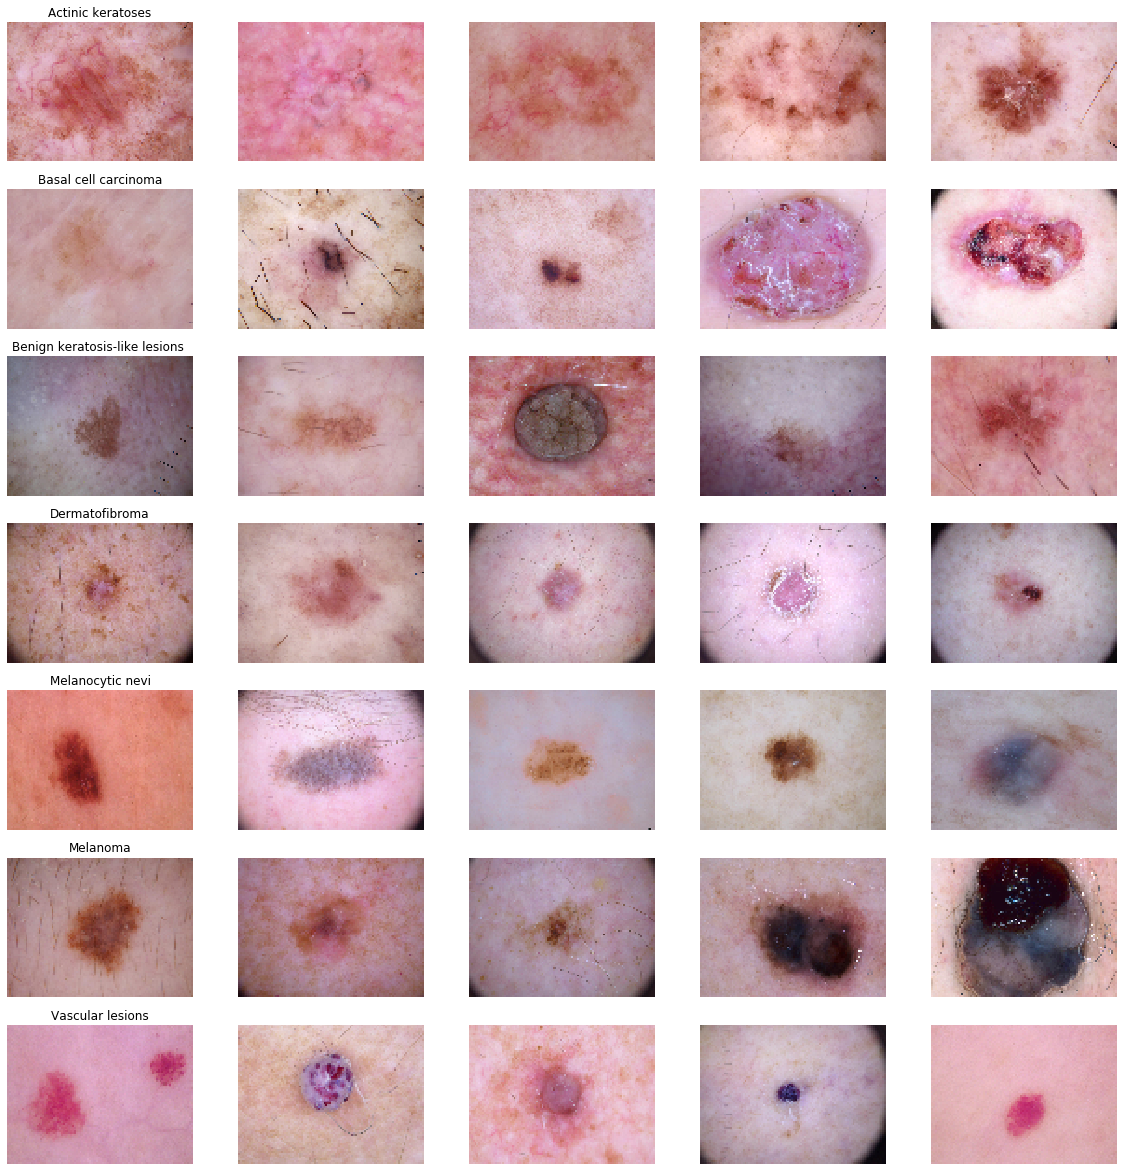

In [18]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [19]:
# Checking the image size distribution
tile_df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    10015
Name: image, dtype: int64

## Train Test Split
splitting (particionar) os dados entre treino e teste com a proporção de 80:20.

In [20]:
%%time
features=tile_df.drop(columns=['cell_type_idx'],axis=1) # remove a variável preditora
target=tile_df['cell_type_idx']

x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

CPU times: user 9.35 ms, sys: 12 µs, total: 9.36 ms
Wall time: 20.7 ms


## Normalização
Subtrair seus valores da médias e dividir pelo desvio-padrão.  

In [21]:
%%time
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

CPU times: user 2.28 s, sys: 1.82 s, total: 4.11 s
Wall time: 4.24 s


In [22]:
x_train.shape

(8012, 75, 100, 3)

## Label Encoding
Label de 7 tipos de doenças de pele (cell types) de 0 a 6. Precisamos usar o hotencode.

In [0]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [24]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Treino e Validação Split
treino:validação  >> 90:10 %

In [25]:
%%time
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

CPU times: user 270 ms, sys: 1.13 s, total: 1.4 s
Wall time: 1.42 s


In [26]:
%%time
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

CPU times: user 41 µs, sys: 0 ns, total: 41 µs
Wall time: 62.2 µs


## Modelo CNN

In [27]:
input_shape = (75, 100, 3)
num_classes = 7
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, 3, padding='same', activation='relu', input_shape=input_shape),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.55),
    Dense(7, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 25, 64)        0

**Data Augmentation** para evitar  overfitting.

In [31]:
%%time
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

CPU times: user 359 ms, sys: 10.8 ms, total: 370 ms
Wall time: 374 ms


## Treinando o Modelo CNN (Fitting) 

In [32]:
batch_size = 10
x_train.shape[0] // batch_size
x_validate.shape[0] // batch_size

80

In [33]:
%%time
epochs = 50 
batch_size = 10
history = model.fit_generator(
    datagen.flow(x_train,y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size, # 721
    epochs=epochs,
    validation_data=(x_validate,y_validate),
    validation_steps=x_validate.shape[0] // batch_size, # 80
    callbacks=[learning_rate_reduction]
)

Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
721/721 [==============================] - 28s 39ms/step - loss: 0.2312 - acc: 0.9112 - val_loss: 0.2063 - val_acc: 0.9179
Epoch 2/50
721/721 [==============================] - 24s 33ms/step - loss: 0.2132 - acc: 0.9175 - val_loss: 0.2204 - val_acc: 0.9149
Epoch 3/50
721/721 [==============================] - 24s 33ms/step - loss: 0.2072 - acc: 0.9202 - val_loss: 0.2237 - val_acc: 0.9131
Epoch 4/50
802/721 [=================================] - 1s 1ms/sample - loss: 0.2254 - acc: 0.9097

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
721/721 [==============================] - 24s 33ms/step - loss: 0.1969 - acc: 0.9227 - val_loss: 0.2189 - val_acc: 0.9097
Epoch 5/50
721/721 [==============================] - 24s 33ms/step - loss: 0.1862 - acc: 0.9263 - val_loss: 0.1822 - val_acc: 0.9280
Epoch 6/50
721/721 [==============================] - 24s 33ms/ste

In [0]:
# MacBookPro-I7-16GB-RAM
# CPU time: user 7h 59min 10s, sys: 2min 13s, total: 8h 1min 23s
# Wall time: 2h 50min 49s

# Servidor Titan - 2 GPUs
# CPU times: user 13min 41s, sys: 42.1 s, total: 14min 24s
# Wall time: 7min 59s

# Google Colab
# CPU times: user 27min 31s, sys: 2min 30s, total: 30min 2s
# Wall time: 19min 43s

# GPU KAGGLE
# CPU times: user 22min 42s, sys: 1min 46s, total: 24min 29s
# Wall time: 16min 34s

## Model Evaluation !!

In [35]:
%%time
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
#model.save("model-MacBookPro.h5")
#model.save("model-MacBookPro.hdf5")
model.save("model-GoogleColab-v01.hdf5")

802/802 [==============================] - 0s 572us/sample - loss: 0.1614 - acc: 0.9332
Validation: accuracy = 0.933203  ;  loss_v = 0.161416
Test: accuracy = 0.931318  ;  loss = 0.167601
CPU times: user 1.02 s, sys: 374 ms, total: 1.39 s
Wall time: 2.24 s


In [0]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

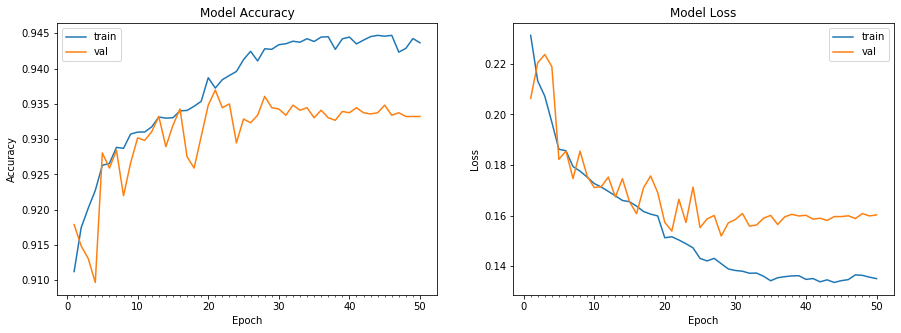

CPU times: user 702 ms, sys: 15 ms, total: 717 ms
Wall time: 717 ms


In [37]:
%%time
plot_model_history(history)

In [0]:
from google.colab import files
model.save("model-GoogleColab-v03.hdf5")
files.download("model-GoogleColab-v03.hdf5")